In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch


In [140]:
def plot_bar(filenames, net):
    top1_accs = []
    top2_accs = []
    top3_accs = []
    for outs in filenames:
        outs = "./exp_data/" + outs
        data = torch.load(outs)
        df = pd.DataFrame(data)
        df['loss'] = df['loss'].astype(float)
        df['steps'] = df['steps'].astype(float)
        df['steps'] = df['steps'].astype(str).str.split('.').str[0].astype(int)
        df = df.sort_values(by='steps', ascending=True)
        top1 = df['top1'].values
        top2 = df['top2'].values
        top3 = df['top3'].values
        if outs == "./exp_data/lineval_resnet50_p128_b256.out":
            top1[-1] = 0.7559
        top1_accs.append(top1)
        top2_accs.append(top2)
        top3_accs.append(top3)
    barWidth = 0.18
    ylim_max = 0.8

    br1 = np.arange(len(top1_accs[0])) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 
    br4 = [x + barWidth for x in br3] 
    br5 = [x + barWidth for x in br4] 

    plt.figure(figsize=(12, 8.3))
    plt.bar(br1, top1_accs[0], color ='tab:blue', width = barWidth, 
            edgecolor ='grey', label ='32') 
    plt.bar(br2, top1_accs[1], color ='tab:orange', width = barWidth, 
            edgecolor ='grey', label ='64') 
    plt.bar(br3, top1_accs[2], color ='tab:green', width = barWidth, 
            edgecolor ='grey', label ='128') 
    plt.bar(br4, top1_accs[3], color ='tab:red', width = barWidth, 
            edgecolor ='grey', label ='256') 
    if net == "RotNet":
        plt.bar(br5, top1_accs[4], color ='tab:purple', width = barWidth, 
                edgecolor ='grey', label ='512') 
        barWidth = 0.35
        ylim_max = 0.8
        plt.plot(br3, [0.6353, 0.6711, 0.6901, 0.6953, 0.6981, 0.6991, 0.6998, 0.6986,
       0.6986, 0.6988], '--g', marker='.', markerfacecolor=None, alpha=0.7, markersize=10) 

#     plt.axhline(y = 0.86, color = 'red', linestyle = ':', linewidth=3) 
    plt.grid(axis='y')
#     plt.title(net, fontsize=20)
    plt.ylim([0,1])
    plt.xlabel('Steps', fontsize = 20) 
    plt.ylabel('Top 1', fontsize = 20) 
    plt.xticks([x + barWidth for x in range(len(top1_accs[0]))], range(500, 5500, 500), fontsize=17)
    plt.yticks(fontsize=17)
    plt.legend(title="Batch Size", loc='upper left', fontsize=16,title_fontsize='16')
    plt.ylim(0.45,ylim_max)
    plt.savefig(net + '_linear_eval_batch.png')
    plt.show() 

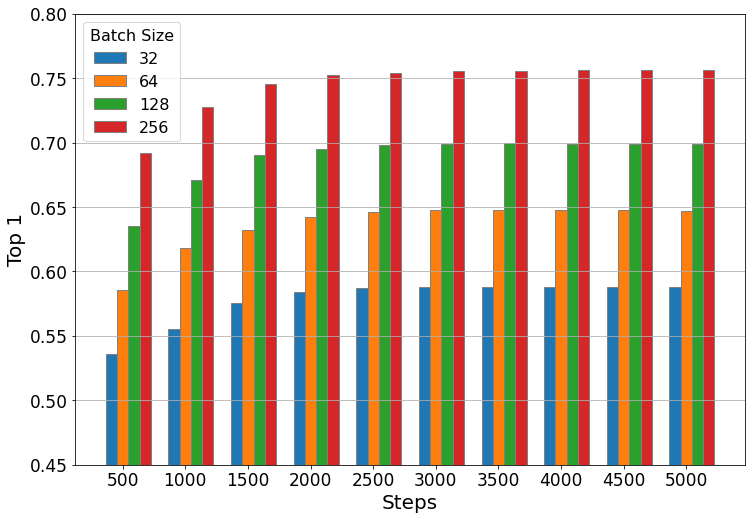

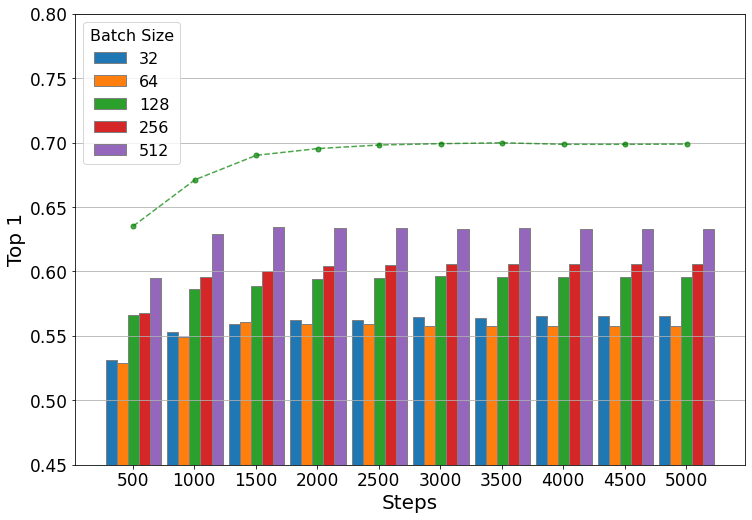

In [141]:
simclr_outs = ["lineval_resnet50_p128_b32.out","lineval_resnet50_p128_b64.out","lineval_resnet50_p128_b128.out","lineval_resnet50_p128_b256.out"]
plot_bar(simclr_outs, "SimCLR")
rotnet_outs = ["lineval_rotnet_b32.out","lineval_rotnet_b64.out","lineval_rotnet_b128.out","lineval_rotnet_b256.out","lineval_rotnet_b512.out"]
plot_bar(rotnet_outs, "RotNet")